In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import os
from rdkit import Chem
from rdkit.Chem import AllChem

In [2]:
# Data loading
chembl = pd.read_csv("C:/Users/user/Desktop/dacon_drug_development/dataset/ChEMBL_ASK1(IC50).csv", sep=';')
pubchem = pd.read_csv("C:/Users/user/Desktop/dacon_drug_development/dataset/Pubchem_ASK1.csv")
# cas = pd.read_csv("C:/Users/user/Desktop/dacon_drug_development/CAS_KPBMA_MAP3K5_IC50s.xlsx", encoding = 'CP949')

C:\Users\user\AppData\Local\Temp\ipykernel_9980\1514216558.py:3: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  pubchem = pd.read_csv("C:/Users/user/Desktop/dacon_drug_development/dataset/Pubchem_ASK1.csv")


### ChEMBL_ASK1 dataset

In [3]:
chembl.head()

,Molecule ChEMBL ID,Molecule Name,Molecule Max Phase,Molecular Weight,#RO5 Violations,AlogP,Compound Key,Smiles,Standard Type,Standard Relation,...,Document ChEMBL ID,Source ID,Source Description,Document Journal,Document Year,Cell ChEMBL ID,Properties,Action Type,Standard Text Value,Value
0,CHEMBL3927617,NaN,NaN,359.81,0,2.68,BDBM128413,Cn1cc(Cl)c2cnc(NC(=O)c3ccc([C@](C)(O)CO)cc3)cc21,IC50,'=',...,CHEMBL3639127,37,BindingDB Patent Bioactivity Data,NaN,2014,NaN,NaN,NaN,NaN,38.000
1,CHEMBL3330172,NaN,NaN,336.44,0,1.84,19,Cc1cc2c(-c3ccc(S(=O)(=O)NCCN)s3)ccnc2[nH]1,IC50,'=',...,CHEMBL3352072,1,Scientific Literature,Bioorg Med Chem Lett,2014,NaN,NaN,NaN,NaN,0.251
2,CHEMBL3402498,NaN,NaN,517.05,2,7.47,24,Cc1cc(C)c2nc(N3C(=O)C(O)=C(C(=O)c4ccc(Cl)cc4)C...,IC50,'=',...,CHEMBL3400130,1,Scientific Literature,Bioorg Med Chem,2015,NaN,NaN,NaN,NaN,6.300
3,CHEMBL3402495,NaN,NaN,500.60,2,6.82,21,Cc1ccc(C(=O)C2=C(O)C(=O)N(c3nc4ccc(F)cc4s3)C2c...,IC50,'=',...,CHEMBL3400130,1,Scientific Literature,Bioorg Med Chem,2015,NaN,NaN,NaN,NaN,7.600
4,CHEMBL3402491,NaN,NaN,490.97,1,6.13,17,CCOc1ccc2nc(N3C(=O)C(O)=C(C(=O)c4ccccc4)C3c3cc...,IC50,'=',...,CHEMBL3400130,1,Scientific Literature,Bioorg Med Chem,2015,NaN,NaN,NaN,NaN,4.200


In [4]:
chembl.keys()

Index(['Molecule ChEMBL ID', 'Molecule Name', 'Molecule Max Phase',
       'Molecular Weight', '#RO5 Violations', 'AlogP', 'Compound Key',
       'Smiles', 'Standard Type', 'Standard Relation', 'Standard Value',
       'Standard Units', 'pChEMBL Value', 'Data Validity Comment', 'Comment',
       'Uo Units', 'Ligand Efficiency BEI', 'Ligand Efficiency LE',
       'Ligand Efficiency LLE', 'Ligand Efficiency SEI', 'Potential Duplicate',
       'Assay ChEMBL ID', 'Assay Description', 'Assay Type', 'BAO Format ID',
       'BAO Label', 'Assay Organism', 'Assay Tissue ChEMBL ID',
       'Assay Tissue Name', 'Assay Cell Type', 'Assay Subcellular Fraction',
       'Assay Parameters', 'Assay Variant Accession', 'Assay Variant Mutation',
       'Target ChEMBL ID', 'Target Name', 'Target Organism', 'Target Type',
       'Document ChEMBL ID', 'Source ID', 'Source Description',
       'Document Journal', 'Document Year', 'Cell ChEMBL ID', 'Properties',
       'Action Type', 'Standard Text Value', 'V

In [5]:
chembl.isnull().sum()

Molecule ChEMBL ID              0
Molecule Name                 606
Molecule Max Phase            620
Molecular Weight                0
#RO5 Violations                 0
AlogP                           0
Compound Key                    0
Smiles                          0
Standard Type                   0
Standard Relation              12
Standard Value                 12
Standard Units                 12
pChEMBL Value                 110
Data Validity Comment         823
Comment                       753
Uo Units                       12
Ligand Efficiency BEI         296
Ligand Efficiency LE          296
Ligand Efficiency LLE         296
Ligand Efficiency SEI         296
Potential Duplicate             0
Assay ChEMBL ID                 0
Assay Description               0
Assay Type                      0
BAO Format ID                   0
BAO Label                       0
Assay Organism                 83
Assay Tissue ChEMBL ID        824
Assay Tissue Name             824
Assay Cell Typ

In [6]:
chembl_drop = chembl.drop(['Molecule Name', 'Molecule Max Phase','Compound Key','Standard Relation','Data Validity Comment', 'Comment',
       'Uo Units','Potential Duplicate',
       'Assay ChEMBL ID', 'Assay Description', 'Assay Type', 'BAO Format ID',
       'BAO Label', 'Assay Organism', 'Assay Tissue ChEMBL ID',
       'Assay Tissue Name', 'Assay Cell Type', 'Assay Subcellular Fraction',
       'Assay Parameters', 'Assay Variant Accession', 'Assay Variant Mutation','Target Organism', 'Target Type',
       'Document ChEMBL ID', 'Source ID', 'Source Description',
       'Document Journal', 'Document Year', 'Cell ChEMBL ID', 'Properties',
       'Action Type', 'Standard Text Value', 'Value'], axis=1)

In [7]:
chembl_drop.duplicated(['Molecule ChEMBL ID']).sum()

np.int64(354)

In [8]:
chembl_drop['Standard Type'].nunique() == 1  # True

# Standard Type is always IC50, so we can drop it
chembl_drop = chembl_drop.drop(['Standard Type'], axis=1)

In [9]:
chembl_drop['Standard Units'].nunique() == 1  # True

# Standard Units is always nM, so we can drop it
chembl_drop = chembl_drop.drop(['Standard Units'], axis=1)

In [10]:
chembl_drop['Target ChEMBL ID'].nunique() == 1  # True

# Target ChEMBL ID is always CHEMBL203, so we can drop it
chembl_drop = chembl_drop.drop(['Target ChEMBL ID'], axis=1)

In [11]:
chembl_drop['Target Name'].nunique() == 1  # True

# Target Name is always MAP3K5, so we can drop it
chembl_drop = chembl_drop.drop(['Target Name'], axis=1)

In [12]:
chembl_drop

,Molecule ChEMBL ID,Molecular Weight,#RO5 Violations,AlogP,Smiles,Standard Value,pChEMBL Value,Ligand Efficiency BEI,Ligand Efficiency LE,Ligand Efficiency LLE,Ligand Efficiency SEI
0,CHEMBL3927617,359.81,0,2.68,Cn1cc(Cl)c2cnc(NC(=O)c3ccc([C@](C)(O)CO)cc3)cc21,38.00,7.42,20.62,0.41,4.74,8.49
1,CHEMBL3330172,336.44,0,1.84,Cc1cc2c(-c3ccc(S(=O)(=O)NCCN)s3)ccnc2[nH]1,251.00,6.60,19.62,0.41,4.76,6.54
2,CHEMBL3402498,517.05,2,7.47,Cc1cc(C)c2nc(N3C(=O)C(O)=C(C(=O)c4ccc(Cl)cc4)C...,6300.00,5.20,10.06,0.20,-2.27,7.38
3,CHEMBL3402495,500.60,2,6.82,Cc1ccc(C(=O)C2=C(O)C(=O)N(c3nc4ccc(F)cc4s3)C2c...,7600.00,5.12,10.23,0.19,-1.70,7.26
4,CHEMBL3402491,490.97,1,6.13,CCOc1ccc2nc(N3C(=O)C(O)=C(C(=O)c4ccccc4)C3c3cc...,4200.00,5.38,10.95,0.22,-0.75,6.74
...,...,...,...,...,...,...,...,...,...,...,...
819,CHEMBL3330170,362.32,0,2.97,O=C(Nc1nc2cc(C(F)(F)F)cc(NC3CC3)n2n1)c1cccnc1,131.00,6.88,19.00,0.36,3.91,8.17
820,CHEMBL4783726,411.47,0,3.99,O=C(Nc1cccc(-c2nncn2C2CC2)c1)c1cc(-n2cnc(C3CC3...,2.87,8.54,20.76,0.38,4.55,9.44
821,CHEMBL3330170,362.32,0,2.97,O=C(Nc1nc2cc(C(F)(F)F)cc(NC3CC3)n2n1)c1cccnc1,13.00,7.89,21.77,0.41,4.92,9.36
822,CHEMBL3916717,445.50,0,4.68,Cc1cc(F)c(C(=O)Nc2cccc(-c3nncn3C(C)C)n2)cc1-n1...,7501.00,5.12,11.50,0.21,0.44,5.66


'Standard Type'을 이용해 구한 pIC50  = 'pChEMBL Value'

BUT, 우변은 소수점 두 번째 짜리까지 나타나있는 반면에, 
좌변은 소수점 6자리까지 나타냄 (더 정확한 값)

=> 그래서 'Standard Type'을 이용해 pIC50 열을 생성

In [13]:
def IC50_to_pIC50(ic50_nM):
    ic50_nM = np.clip(ic50_nM, 1e-10, None)
    return 9 - np.log10(ic50_nM)

In [14]:
chembl_drop['Standard Value'] = pd.to_numeric(chembl_drop['Standard Value'], errors='coerce')
chembl_drop['pIC50'] = IC50_to_pIC50(chembl_drop['Standard Value'])

In [15]:
chembl_drop = chembl_drop.rename(columns={'Smiles': 'smiles', 'Standard Value': 'IC50_nM'})
chembl_drop = chembl_drop.drop(['pChEMBL Value'], axis=1)

In [16]:
chembl_drop

,Molecule ChEMBL ID,Molecular Weight,#RO5 Violations,AlogP,smiles,IC50_nM,Ligand Efficiency BEI,Ligand Efficiency LE,Ligand Efficiency LLE,Ligand Efficiency SEI,pIC50
0,CHEMBL3927617,359.81,0,2.68,Cn1cc(Cl)c2cnc(NC(=O)c3ccc([C@](C)(O)CO)cc3)cc21,38.00,20.62,0.41,4.74,8.49,7.420216
1,CHEMBL3330172,336.44,0,1.84,Cc1cc2c(-c3ccc(S(=O)(=O)NCCN)s3)ccnc2[nH]1,251.00,19.62,0.41,4.76,6.54,6.600326
2,CHEMBL3402498,517.05,2,7.47,Cc1cc(C)c2nc(N3C(=O)C(O)=C(C(=O)c4ccc(Cl)cc4)C...,6300.00,10.06,0.20,-2.27,7.38,5.200659
3,CHEMBL3402495,500.60,2,6.82,Cc1ccc(C(=O)C2=C(O)C(=O)N(c3nc4ccc(F)cc4s3)C2c...,7600.00,10.23,0.19,-1.70,7.26,5.119186
4,CHEMBL3402491,490.97,1,6.13,CCOc1ccc2nc(N3C(=O)C(O)=C(C(=O)c4ccccc4)C3c3cc...,4200.00,10.95,0.22,-0.75,6.74,5.376751
...,...,...,...,...,...,...,...,...,...,...,...
819,CHEMBL3330170,362.32,0,2.97,O=C(Nc1nc2cc(C(F)(F)F)cc(NC3CC3)n2n1)c1cccnc1,131.00,19.00,0.36,3.91,8.17,6.882729
820,CHEMBL4783726,411.47,0,3.99,O=C(Nc1cccc(-c2nncn2C2CC2)c1)c1cc(-n2cnc(C3CC3...,2.87,20.76,0.38,4.55,9.44,8.542118
821,CHEMBL3330170,362.32,0,2.97,O=C(Nc1nc2cc(C(F)(F)F)cc(NC3CC3)n2n1)c1cccnc1,13.00,21.77,0.41,4.92,9.36,7.886057
822,CHEMBL3916717,445.50,0,4.68,Cc1cc(F)c(C(=O)Nc2cccc(-c3nncn3C(C)C)n2)cc1-n1...,7501.00,11.50,0.21,0.44,5.66,5.124881


In [17]:
chembl_drop.columns

Index(['Molecule ChEMBL ID', 'Molecular Weight', '#RO5 Violations', 'AlogP',
       'smiles', 'IC50_nM', 'Ligand Efficiency BEI', 'Ligand Efficiency LE',
       'Ligand Efficiency LLE', 'Ligand Efficiency SEI', 'pIC50'],
      dtype='object')

In [18]:
chembl_drop_IC50 = chembl_drop.drop(['Molecular Weight', '#RO5 Violations', 'AlogP','Ligand Efficiency BEI', 'Ligand Efficiency LE',
       'Ligand Efficiency LLE', 'Ligand Efficiency SEI'], axis=1)

In [19]:
chembl_drop_IC50

,Molecule ChEMBL ID,smiles,IC50_nM,pIC50
0,CHEMBL3927617,Cn1cc(Cl)c2cnc(NC(=O)c3ccc([C@](C)(O)CO)cc3)cc21,38.00,7.420216
1,CHEMBL3330172,Cc1cc2c(-c3ccc(S(=O)(=O)NCCN)s3)ccnc2[nH]1,251.00,6.600326
2,CHEMBL3402498,Cc1cc(C)c2nc(N3C(=O)C(O)=C(C(=O)c4ccc(Cl)cc4)C...,6300.00,5.200659
3,CHEMBL3402495,Cc1ccc(C(=O)C2=C(O)C(=O)N(c3nc4ccc(F)cc4s3)C2c...,7600.00,5.119186
4,CHEMBL3402491,CCOc1ccc2nc(N3C(=O)C(O)=C(C(=O)c4ccccc4)C3c3cc...,4200.00,5.376751
...,...,...,...,...
819,CHEMBL3330170,O=C(Nc1nc2cc(C(F)(F)F)cc(NC3CC3)n2n1)c1cccnc1,131.00,6.882729
820,CHEMBL4783726,O=C(Nc1cccc(-c2nncn2C2CC2)c1)c1cc(-n2cnc(C3CC3...,2.87,8.542118
821,CHEMBL3330170,O=C(Nc1nc2cc(C(F)(F)F)cc(NC3CC3)n2n1)c1cccnc1,13.00,7.886057
822,CHEMBL3916717,Cc1cc(F)c(C(=O)Nc2cccc(-c3nncn3C(C)C)n2)cc1-n1...,7501.00,5.124881


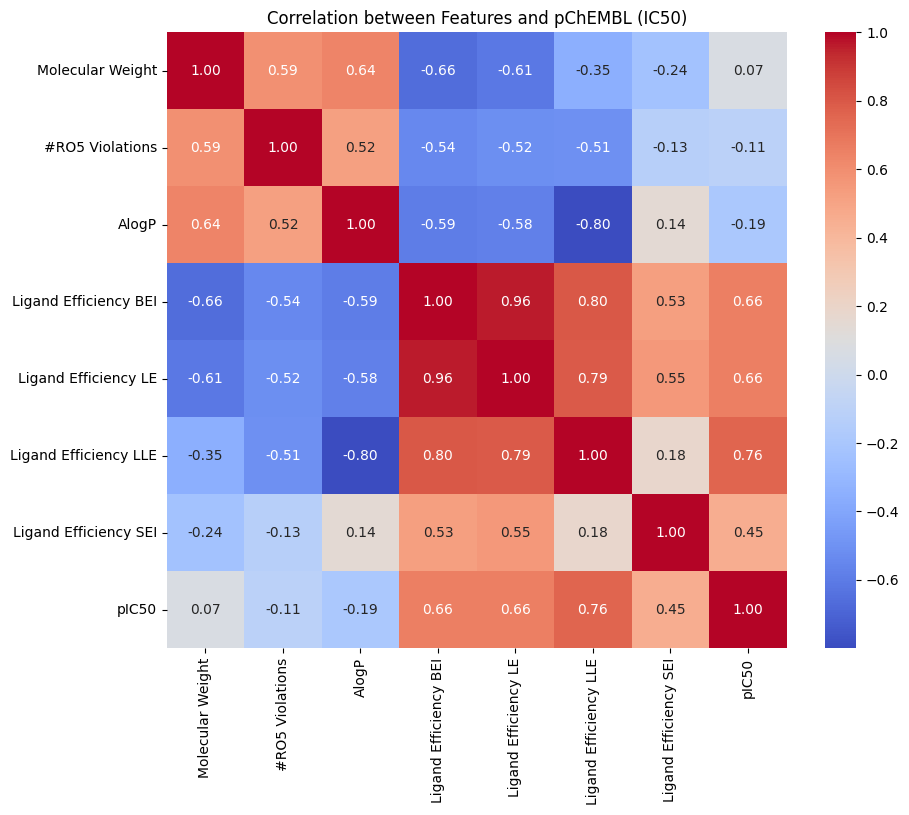

In [20]:
# heatmap
# chembl_heatmap = chembl_drop['Molecular Weight', '#RO5 Violations','AlogP','Ligand Efficiency BEI', 'Ligand Efficiency LE','Ligand Efficiency LLE', 'Ligand Efficiency SEI', 'pIC50']
corr = chembl_drop[['Molecular Weight', '#RO5 Violations','AlogP','Ligand Efficiency BEI', 'Ligand Efficiency LE',
       'Ligand Efficiency LLE', 'Ligand Efficiency SEI','pIC50']].corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation between Features and pChEMBL (IC50)")
plt.show()

In [21]:
# ID 중복된 것 찾기
duplicated_ids = chembl_drop[chembl_drop.duplicated(subset='Molecule ChEMBL ID', keep=False)]
print(duplicated_ids)

    Molecule ChEMBL ID  Molecular Weight  #RO5 Violations  AlogP  \
5        CHEMBL3916717            445.50                0   4.68   
6        CHEMBL3916717            445.50                0   4.68   
7        CHEMBL3916717            445.50                0   4.68   
8        CHEMBL3916717            445.50                0   4.68   
9        CHEMBL3916717            445.50                0   4.68   
..                 ...               ...              ...    ...   
819      CHEMBL3330170            362.32                0   2.97   
820      CHEMBL4783726            411.47                0   3.99   
821      CHEMBL3330170            362.32                0   2.97   
822      CHEMBL3916717            445.50                0   4.68   
823      CHEMBL4449840            509.56                2   6.19   

                                                smiles  IC50_nM  \
5    Cc1cc(F)c(C(=O)Nc2cccc(-c3nncn3C(C)C)n2)cc1-n1...  1384.00   
6    Cc1cc(F)c(C(=O)Nc2cccc(-c3nncn3C(C)C)n2)cc1-

In [22]:
# 중복된 ID 그룹별로 값이 동일한지 확인
diff_check = duplicated_ids.groupby('Molecule ChEMBL ID').nunique()
print(diff_check)

                    Molecular Weight  #RO5 Violations  AlogP  smiles  IC50_nM  \
Molecule ChEMBL ID                                                              
CHEMBL1231206                      1                1      1       1        1   
CHEMBL1642655                      1                1      1       1        1   
CHEMBL1765740                      1                1      1       1        2   
CHEMBL2348417                      1                1      1       1        1   
CHEMBL3330170                      1                1      1       1        4   
...                              ...              ...    ...     ...      ...   
CHEMBL4875364                      1                1      1       1        2   
CHEMBL4876558                      1                1      1       1        2   
CHEMBL4877113                      1                1      1       1        2   
CHEMBL4878163                      1                1      1       1        2   
CHEMBL4878227               

### Pubchem_ASK1 dataset

In [23]:
pubchem.head()

,Bioactivity_ID,Activity_Value,BioAssay_AID,Substance_SID,Compound_CID,refsid,Gene_ID,PMID,Aid_Type,Last_Modified_Date,...,Taxonomy_ID,Cell_ID,Target_Taxonomy_ID,Anatomy_ID,Anatomy,dois,pmcids,pclids,citations,SMILES
0,363645869,0.00010,1404085,404713175,145990765,NaN,4217,29348070.0,Confirmatory,20220830,...,9606,NaN,NaN,NaN,NaN,10.1016/j.ejmech.2017.12.041,NaN,29725507.0,"Lovering F, Morgan P, Allais C, Aulabaugh A, B...",CC1=CC(=C(C=C1S(=O)(=O)N)C(=O)NC2=CC=CC(=N2)C3...
1,363645871,0.00032,1404085,404710600,145989111,NaN,4217,29348070.0,Confirmatory,20220830,...,9606,NaN,NaN,NaN,NaN,10.1016/j.ejmech.2017.12.041,NaN,29725507.0,"Lovering F, Morgan P, Allais C, Aulabaugh A, B...",CCS(=O)(=O)NC1=CC(=C(C=C1)OC)C(=O)NC2=CC=CC(=N...
2,402153100,0.00040,1798298,315662963,91810341,NaN,4217,NaN,Confirmatory,20240109,...,9606,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CNC(=O)C1CCN(CC1)C2=CN=C(C=C2N3C=C(N=C3)C4CC4)...
3,363645870,0.00042,1404085,404718488,145994100,NaN,4217,29348070.0,Confirmatory,20220830,...,9606,NaN,NaN,NaN,NaN,10.1016/j.ejmech.2017.12.041,NaN,29725507.0,"Lovering F, Morgan P, Allais C, Aulabaugh A, B...",CC1=CC(=C(C=C1C(=O)N)C(=O)NC2=CC=CC(=N2)C3=NN=...
4,363647477,0.00069,1410111,123092436,44259,505885041.0,4217,29558119.0,Confirmatory,20220830,...,9606,NaN,NaN,NaN,NaN,10.1021/acs.jnatprod.7b01058,NaN,31083176.0,"Wang JN, Zhang HJ, Li JQ, Ding WJ, Ma ZJ. Bioa...",CC12C(C(CC(O1)N3C4=CC=CC=C4C5=C6C(=C7C8=CC=CC=...


In [24]:
pubchem.keys()

Index(['Bioactivity_ID', 'Activity_Value', 'BioAssay_AID', 'Substance_SID',
       'Compound_CID', 'refsid', 'Gene_ID', 'PMID', 'Aid_Type',
       'Last_Modified_Date', 'Has_Dose_Response_Curve', 'RNAi_BioAssay',
       'Activity', 'Protein_Accession', 'Activity_Type', 'Activity_Qualifier',
       'Bioassay_Data_Source', 'BioAssay_Name', 'Compound_Name', 'Target_Name',
       'Target_Link', 'ECs', 'Representative_Protein_Accession', 'Taxonomy_ID',
       'Cell_ID', 'Target_Taxonomy_ID', 'Anatomy_ID', 'Anatomy', 'dois',
       'pmcids', 'pclids', 'citations', 'SMILES'],
      dtype='object')

In [25]:
pubchem_drop = pubchem.drop(['refsid','PMID', 'Aid_Type',
       'Last_Modified_Date', 'Has_Dose_Response_Curve', 'RNAi_BioAssay','Activity_Qualifier',
       'Bioassay_Data_Source','Compound_Name','Target_Link', 'ECs', 'Representative_Protein_Accession', 'Taxonomy_ID',
       'Cell_ID', 'Target_Taxonomy_ID', 'Anatomy_ID', 'Anatomy', 'dois',
       'pmcids', 'pclids', 'citations'], axis=1)

In [26]:
pubchem_drop

,Bioactivity_ID,Activity_Value,BioAssay_AID,Substance_SID,Compound_CID,Gene_ID,Activity,Protein_Accession,Activity_Type,BioAssay_Name,Target_Name,SMILES
0,363645869,0.00010,1404085,404713175,145990765,4217,Active,Q99683,IC50,Inhibition of recombinant full length human GS...,MAP3K5 - mitogen-activated protein kinase kina...,CC1=CC(=C(C=C1S(=O)(=O)N)C(=O)NC2=CC=CC(=N2)C3...
1,363645871,0.00032,1404085,404710600,145989111,4217,Active,Q99683,IC50,Inhibition of recombinant full length human GS...,MAP3K5 - mitogen-activated protein kinase kina...,CCS(=O)(=O)NC1=CC(=C(C=C1)OC)C(=O)NC2=CC=CC(=N...
2,402153100,0.00040,1798298,315662963,91810341,4217,Active,Q99683,IC50,Apoptosis Signal-Regulating Kinase Assay from ...,MAP3K5 - mitogen-activated protein kinase kina...,CNC(=O)C1CCN(CC1)C2=CN=C(C=C2N3C=C(N=C3)C4CC4)...
3,363645870,0.00042,1404085,404718488,145994100,4217,Active,Q99683,IC50,Inhibition of recombinant full length human GS...,MAP3K5 - mitogen-activated protein kinase kina...,CC1=CC(=C(C=C1C(=O)N)C(=O)NC2=CC=CC(=N2)C3=NN=...
4,363647477,0.00069,1410111,123092436,44259,4217,Active,Q99683,IC50,Inhibition of ASK1 (unknown origin) by HTRF assay,MAP3K5 - mitogen-activated protein kinase kina...,CC12C(C(CC(O1)N3C4=CC=CC=C4C5=C6C(=C7C8=CC=CC=...
...,...,...,...,...,...,...,...,...,...,...,...,...
23790,380791343,NaN,1912550,318392326,58557659,4217,Unspecified,Q99683,NaN,Thermal Shift Assay. Domain: start/stop: R659-...,MAP3K5 - mitogen-activated protein kinase kina...,CCC1CN(CC1C2=CN=C3N2C4=C(NC=C4)N=C3)C(=O)NCC(F...
23791,380791344,NaN,1912550,461533915,44537856,4217,Unspecified,Q99683,NaN,Thermal Shift Assay. Domain: start/stop: R659-...,MAP3K5 - mitogen-activated protein kinase kina...,CCC1=C(C(=CC=C1)CC)NC(=O)C2=NN(C3=C2CCC4=CN=C(...
23792,380791345,NaN,1912550,103641275,9874913,4217,Unspecified,Q99683,NaN,Thermal Shift Assay. Domain: start/stop: R659-...,MAP3K5 - mitogen-activated protein kinase kina...,CC1=NC=C(C=C1)OC2=C(C=C(C=C2)NC3=NC=NC4=C3C=C(...
23793,380791346,NaN,1912550,242579185,25073775,4217,Unspecified,Q99683,NaN,Thermal Shift Assay. Domain: start/stop: R659-...,MAP3K5 - mitogen-activated protein kinase kina...,CNC(=O)C1=CC=CC=C1NC2=CC(=NC=C2C(F)(F)F)NC3=C(...


In [27]:
pubchem_drop['Gene_ID'].nunique() == 1  # True

# Gene_ID is always MAP3K5, so we can drop it
pubchem_drop = pubchem_drop.drop(['Gene_ID'], axis=1)

In [28]:
pubchem_drop['Target_Name'].nunique() == 1  # True

# Target_Name is always MAP3K5, so we can drop it
pubchem_drop = pubchem_drop.drop(['Target_Name'], axis=1)

In [29]:
pubchem_drop

,Bioactivity_ID,Activity_Value,BioAssay_AID,Substance_SID,Compound_CID,Activity,Protein_Accession,Activity_Type,BioAssay_Name,SMILES
0,363645869,0.00010,1404085,404713175,145990765,Active,Q99683,IC50,Inhibition of recombinant full length human GS...,CC1=CC(=C(C=C1S(=O)(=O)N)C(=O)NC2=CC=CC(=N2)C3...
1,363645871,0.00032,1404085,404710600,145989111,Active,Q99683,IC50,Inhibition of recombinant full length human GS...,CCS(=O)(=O)NC1=CC(=C(C=C1)OC)C(=O)NC2=CC=CC(=N...
2,402153100,0.00040,1798298,315662963,91810341,Active,Q99683,IC50,Apoptosis Signal-Regulating Kinase Assay from ...,CNC(=O)C1CCN(CC1)C2=CN=C(C=C2N3C=C(N=C3)C4CC4)...
3,363645870,0.00042,1404085,404718488,145994100,Active,Q99683,IC50,Inhibition of recombinant full length human GS...,CC1=CC(=C(C=C1C(=O)N)C(=O)NC2=CC=CC(=N2)C3=NN=...
4,363647477,0.00069,1410111,123092436,44259,Active,Q99683,IC50,Inhibition of ASK1 (unknown origin) by HTRF assay,CC12C(C(CC(O1)N3C4=CC=CC=C4C5=C6C(=C7C8=CC=CC=...
...,...,...,...,...,...,...,...,...,...,...
23790,380791343,NaN,1912550,318392326,58557659,Unspecified,Q99683,NaN,Thermal Shift Assay. Domain: start/stop: R659-...,CCC1CN(CC1C2=CN=C3N2C4=C(NC=C4)N=C3)C(=O)NCC(F...
23791,380791344,NaN,1912550,461533915,44537856,Unspecified,Q99683,NaN,Thermal Shift Assay. Domain: start/stop: R659-...,CCC1=C(C(=CC=C1)CC)NC(=O)C2=NN(C3=C2CCC4=CN=C(...
23792,380791345,NaN,1912550,103641275,9874913,Unspecified,Q99683,NaN,Thermal Shift Assay. Domain: start/stop: R659-...,CC1=NC=C(C=C1)OC2=C(C=C(C=C2)NC3=NC=NC4=C3C=C(...
23793,380791346,NaN,1912550,242579185,25073775,Unspecified,Q99683,NaN,Thermal Shift Assay. Domain: start/stop: R659-...,CNC(=O)C1=CC=CC=C1NC2=CC(=NC=C2C(F)(F)F)NC3=C(...


In [30]:
pubchem_drop['Activity'].unique(), pubchem_drop['Activity'].value_counts()
# (array(['Active', 'Unspecified', 'Inactive', 'Inconclusive'], dtype=object),
#  Activity
#  Inactive        22071
#  Active            953
#  Unspecified       767
#  Inconclusive        4
#  Name: count, dtype: int64)

# Not that important
pubchem_drop = pubchem_drop.drop(['Activity'], axis=1)

In [31]:
pubchem_drop['Protein_Accession'].nunique(), pubchem_drop['Protein_Accession'].value_counts()
# (2,
#  Protein_Accession
#  NP_005914    22381
#  Q99683        1414
#  Name: count, dtype: int64)

# Accession 번호는 NCBI에 등록된 특정 단백질로, 이 번호를 통해 NCBI 데이터베이스에서 해당 단백질의 아미노산 서열, 분자량, 기능, 관련 논문 등을 찾을 수 있음.
# NP_005914(Entrez Gene Number) == Q99683(UniProt Number) : Anti-MAP3K5 Antibody (https://www.merckmillipore.com/KR/ko/product/Anti-MAP3K5-Antibody-clone-2E4,MM_NF-MABC632)

pubchem_drop = pubchem_drop.drop(['Protein_Accession'], axis=1)

In [32]:
pubchem_drop['Activity_Type'].nunique(), pubchem_drop['Activity_Type'].value_counts()

(5,
 Activity_Type
 IC50    1039
 Ki        91
 Kd        32
 EC50      13
 Km         3
 Name: count, dtype: int64)

In [33]:
pubchem_drop['BioAssay_Name'].unique(), pubchem_drop['BioAssay_Name'].value_counts()
# Not that important
pubchem_drop = pubchem_drop.drop(['BioAssay_Name'], axis=1)

In [34]:
pubchem_drop = pubchem_drop.drop(['BioAssay_AID', 'Substance_SID', 'Compound_CID'], axis=1)

# PubChem consists of three interconnected databases: Substance, BioAssay and Compound. 
# The Substance database (SID): contributed sample descriptions (primarily small molecules) provided by depositors.
# The BioAssay database (AID) : contributed assay descriptions and associated biological screening results of substances provided by depositors. 
# The Compound database (CID) : the unique chemical structures derived from the Substance database records, thus allowing substance information (e.g. bioassay data) from different depositors to be viewed for unique chemical structures.

In [35]:
pubchem_drop

,Bioactivity_ID,Activity_Value,Activity_Type,SMILES
0,363645869,0.00010,IC50,CC1=CC(=C(C=C1S(=O)(=O)N)C(=O)NC2=CC=CC(=N2)C3...
1,363645871,0.00032,IC50,CCS(=O)(=O)NC1=CC(=C(C=C1)OC)C(=O)NC2=CC=CC(=N...
2,402153100,0.00040,IC50,CNC(=O)C1CCN(CC1)C2=CN=C(C=C2N3C=C(N=C3)C4CC4)...
3,363645870,0.00042,IC50,CC1=CC(=C(C=C1C(=O)N)C(=O)NC2=CC=CC(=N2)C3=NN=...
4,363647477,0.00069,IC50,CC12C(C(CC(O1)N3C4=CC=CC=C4C5=C6C(=C7C8=CC=CC=...
...,...,...,...,...
23790,380791343,NaN,NaN,CCC1CN(CC1C2=CN=C3N2C4=C(NC=C4)N=C3)C(=O)NCC(F...
23791,380791344,NaN,NaN,CCC1=C(C(=CC=C1)CC)NC(=O)C2=NN(C3=C2CCC4=CN=C(...
23792,380791345,NaN,NaN,CC1=NC=C(C=C1)OC2=C(C=C(C=C2)NC3=NC=NC4=C3C=C(...
23793,380791346,NaN,NaN,CNC(=O)C1=CC=CC=C1NC2=CC(=NC=C2C(F)(F)F)NC3=C(...


In [36]:
pubchem_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23795 entries, 0 to 23794
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Bioactivity_ID  23795 non-null  int64  
 1   Activity_Value  1148 non-null   float64
 2   Activity_Type   1178 non-null   object 
 3   SMILES          23795 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 743.7+ KB


In [37]:
# IC50이고, 그 값이 NaN이 아닌 행만 추출 -> test
pubchem_drop_IC50 = pubchem_drop[pubchem_drop['Activity_Type'] == 'IC50'].dropna()
pubchem_drop_IC50

,Bioactivity_ID,Activity_Value,Activity_Type,SMILES
0,363645869,0.00010,IC50,CC1=CC(=C(C=C1S(=O)(=O)N)C(=O)NC2=CC=CC(=N2)C3...
1,363645871,0.00032,IC50,CCS(=O)(=O)NC1=CC(=C(C=C1)OC)C(=O)NC2=CC=CC(=N...
2,402153100,0.00040,IC50,CNC(=O)C1CCN(CC1)C2=CN=C(C=C2N3C=C(N=C3)C4CC4)...
3,363645870,0.00042,IC50,CC1=CC(=C(C=C1C(=O)N)C(=O)NC2=CC=CC(=N2)C3=NN=...
4,363647477,0.00069,IC50,CC12C(C(CC(O1)N3C4=CC=CC=C4C5=C6C(=C7C8=CC=CC=...
...,...,...,...,...
1143,345588249,63.00000,IC50,CC1=CC(=C2C(=C1)SC(=N2)N3C(C(=C(C3=O)O)C(=O)C4...
1144,101518150,82.70000,IC50,CN1C=C(C2=CC=CC=C21)C=C3C4=CC=CC=C4NC3=O
1145,101517824,100.00000,IC50,CN1C=C(C2=CC=CC=C21)C=C3C4=CC=CC=C4NC3=O
1146,363833782,100.00000,IC50,CCN1C=C(N=C1)NC(=O)C2=CSC=N2


In [38]:
# 'Activity_Type'이 모두 IC50이므로, 'Activity_Type' 컬럼은 필요 없음
pubchem_drop_IC50 = pubchem_drop_IC50.drop(['Activity_Type'], axis=1)

In [39]:
pubchem_drop_IC50

,Bioactivity_ID,Activity_Value,SMILES
0,363645869,0.00010,CC1=CC(=C(C=C1S(=O)(=O)N)C(=O)NC2=CC=CC(=N2)C3...
1,363645871,0.00032,CCS(=O)(=O)NC1=CC(=C(C=C1)OC)C(=O)NC2=CC=CC(=N...
2,402153100,0.00040,CNC(=O)C1CCN(CC1)C2=CN=C(C=C2N3C=C(N=C3)C4CC4)...
3,363645870,0.00042,CC1=CC(=C(C=C1C(=O)N)C(=O)NC2=CC=CC(=N2)C3=NN=...
4,363647477,0.00069,CC12C(C(CC(O1)N3C4=CC=CC=C4C5=C6C(=C7C8=CC=CC=...
...,...,...,...
1143,345588249,63.00000,CC1=CC(=C2C(=C1)SC(=N2)N3C(C(=C(C3=O)O)C(=O)C4...
1144,101518150,82.70000,CN1C=C(C2=CC=CC=C21)C=C3C4=CC=CC=C4NC3=O
1145,101517824,100.00000,CN1C=C(C2=CC=CC=C21)C=C3C4=CC=CC=C4NC3=O
1146,363833782,100.00000,CCN1C=C(N=C1)NC(=O)C2=CSC=N2


In [40]:
pubchem_drop_IC50 = pubchem_drop_IC50.rename(columns={'SMILES': 'smiles', 'Activity_Value': 'IC50_nM'})

In [41]:
pubchem_drop_IC50

,Bioactivity_ID,IC50_nM,smiles
0,363645869,0.00010,CC1=CC(=C(C=C1S(=O)(=O)N)C(=O)NC2=CC=CC(=N2)C3...
1,363645871,0.00032,CCS(=O)(=O)NC1=CC(=C(C=C1)OC)C(=O)NC2=CC=CC(=N...
2,402153100,0.00040,CNC(=O)C1CCN(CC1)C2=CN=C(C=C2N3C=C(N=C3)C4CC4)...
3,363645870,0.00042,CC1=CC(=C(C=C1C(=O)N)C(=O)NC2=CC=CC(=N2)C3=NN=...
4,363647477,0.00069,CC12C(C(CC(O1)N3C4=CC=CC=C4C5=C6C(=C7C8=CC=CC=...
...,...,...,...
1143,345588249,63.00000,CC1=CC(=C2C(=C1)SC(=N2)N3C(C(=C(C3=O)O)C(=O)C4...
1144,101518150,82.70000,CN1C=C(C2=CC=CC=C21)C=C3C4=CC=CC=C4NC3=O
1145,101517824,100.00000,CN1C=C(C2=CC=CC=C21)C=C3C4=CC=CC=C4NC3=O
1146,363833782,100.00000,CCN1C=C(N=C1)NC(=O)C2=CSC=N2


In [42]:
pubchem_drop_IC50['IC50_nM'] = pd.to_numeric(pubchem_drop_IC50['IC50_nM'], errors='coerce')
pubchem_drop_IC50['pIC50'] = IC50_to_pIC50(pubchem_drop_IC50['IC50_nM'])

In [43]:
pubchem_drop_IC50

,Bioactivity_ID,IC50_nM,smiles,pIC50
0,363645869,0.00010,CC1=CC(=C(C=C1S(=O)(=O)N)C(=O)NC2=CC=CC(=N2)C3...,13.000000
1,363645871,0.00032,CCS(=O)(=O)NC1=CC(=C(C=C1)OC)C(=O)NC2=CC=CC(=N...,12.494850
2,402153100,0.00040,CNC(=O)C1CCN(CC1)C2=CN=C(C=C2N3C=C(N=C3)C4CC4)...,12.397940
3,363645870,0.00042,CC1=CC(=C(C=C1C(=O)N)C(=O)NC2=CC=CC(=N2)C3=NN=...,12.376751
4,363647477,0.00069,CC12C(C(CC(O1)N3C4=CC=CC=C4C5=C6C(=C7C8=CC=CC=...,12.161151
...,...,...,...,...
1143,345588249,63.00000,CC1=CC(=C2C(=C1)SC(=N2)N3C(C(=C(C3=O)O)C(=O)C4...,7.200659
1144,101518150,82.70000,CN1C=C(C2=CC=CC=C21)C=C3C4=CC=CC=C4NC3=O,7.082494
1145,101517824,100.00000,CN1C=C(C2=CC=CC=C21)C=C3C4=CC=CC=C4NC3=O,7.000000
1146,363833782,100.00000,CCN1C=C(N=C1)NC(=O)C2=CSC=N2,7.000000


### 최종 model test/validation용 dataset
- chembl_drop_IC50
- pubchem_drop_IC50

In [44]:
chembl_drop_IC50

,Molecule ChEMBL ID,smiles,IC50_nM,pIC50
0,CHEMBL3927617,Cn1cc(Cl)c2cnc(NC(=O)c3ccc([C@](C)(O)CO)cc3)cc21,38.00,7.420216
1,CHEMBL3330172,Cc1cc2c(-c3ccc(S(=O)(=O)NCCN)s3)ccnc2[nH]1,251.00,6.600326
2,CHEMBL3402498,Cc1cc(C)c2nc(N3C(=O)C(O)=C(C(=O)c4ccc(Cl)cc4)C...,6300.00,5.200659
3,CHEMBL3402495,Cc1ccc(C(=O)C2=C(O)C(=O)N(c3nc4ccc(F)cc4s3)C2c...,7600.00,5.119186
4,CHEMBL3402491,CCOc1ccc2nc(N3C(=O)C(O)=C(C(=O)c4ccccc4)C3c3cc...,4200.00,5.376751
...,...,...,...,...
819,CHEMBL3330170,O=C(Nc1nc2cc(C(F)(F)F)cc(NC3CC3)n2n1)c1cccnc1,131.00,6.882729
820,CHEMBL4783726,O=C(Nc1cccc(-c2nncn2C2CC2)c1)c1cc(-n2cnc(C3CC3...,2.87,8.542118
821,CHEMBL3330170,O=C(Nc1nc2cc(C(F)(F)F)cc(NC3CC3)n2n1)c1cccnc1,13.00,7.886057
822,CHEMBL3916717,Cc1cc(F)c(C(=O)Nc2cccc(-c3nncn3C(C)C)n2)cc1-n1...,7501.00,5.124881


In [45]:
pubchem_drop_IC50

,Bioactivity_ID,IC50_nM,smiles,pIC50
0,363645869,0.00010,CC1=CC(=C(C=C1S(=O)(=O)N)C(=O)NC2=CC=CC(=N2)C3...,13.000000
1,363645871,0.00032,CCS(=O)(=O)NC1=CC(=C(C=C1)OC)C(=O)NC2=CC=CC(=N...,12.494850
2,402153100,0.00040,CNC(=O)C1CCN(CC1)C2=CN=C(C=C2N3C=C(N=C3)C4CC4)...,12.397940
3,363645870,0.00042,CC1=CC(=C(C=C1C(=O)N)C(=O)NC2=CC=CC(=N2)C3=NN=...,12.376751
4,363647477,0.00069,CC12C(C(CC(O1)N3C4=CC=CC=C4C5=C6C(=C7C8=CC=CC=...,12.161151
...,...,...,...,...
1143,345588249,63.00000,CC1=CC(=C2C(=C1)SC(=N2)N3C(C(=C(C3=O)O)C(=O)C4...,7.200659
1144,101518150,82.70000,CN1C=C(C2=CC=CC=C21)C=C3C4=CC=CC=C4NC3=O,7.082494
1145,101517824,100.00000,CN1C=C(C2=CC=CC=C21)C=C3C4=CC=CC=C4NC3=O,7.000000
1146,363833782,100.00000,CCN1C=C(N=C1)NC(=O)C2=CSC=N2,7.000000


In [46]:
# 각 dataset의 ID 컬럼 제거
chembl_drop_IC50 = chembl_drop_IC50.drop(['Molecule ChEMBL ID'], axis=1)
pubchem_drop_IC50 = pubchem_drop_IC50.drop(['Bioactivity_ID'], axis=1)

In [47]:
IC50_dataset = pd.concat([chembl_drop_IC50, pubchem_drop_IC50], ignore_index=True)

In [48]:
IC50_dataset

,smiles,IC50_nM,pIC50
0,Cn1cc(Cl)c2cnc(NC(=O)c3ccc([C@](C)(O)CO)cc3)cc21,38.0,7.420216
1,Cc1cc2c(-c3ccc(S(=O)(=O)NCCN)s3)ccnc2[nH]1,251.0,6.600326
2,Cc1cc(C)c2nc(N3C(=O)C(O)=C(C(=O)c4ccc(Cl)cc4)C...,6300.0,5.200659
3,Cc1ccc(C(=O)C2=C(O)C(=O)N(c3nc4ccc(F)cc4s3)C2c...,7600.0,5.119186
4,CCOc1ccc2nc(N3C(=O)C(O)=C(C(=O)c4ccccc4)C3c3cc...,4200.0,5.376751
...,...,...,...
1846,CC1=CC(=C2C(=C1)SC(=N2)N3C(C(=C(C3=O)O)C(=O)C4...,63.0,7.200659
1847,CN1C=C(C2=CC=CC=C21)C=C3C4=CC=CC=C4NC3=O,82.7,7.082494
1848,CN1C=C(C2=CC=CC=C21)C=C3C4=CC=CC=C4NC3=O,100.0,7.000000
1849,CCN1C=C(N=C1)NC(=O)C2=CSC=N2,100.0,7.000000


In [49]:
CFG = {
    'NBITS': 2048,
    'SEED': 42
}


def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

seed_everything(CFG['SEED'])


# SMILES 데이터를 분자 지문으로 변환
def smiles_to_fingerprint(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is not None:
        fp = AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=CFG['NBITS'])
        return np.array(fp)
    else:
        return np.zeros((CFG['NBITS'],))

In [50]:
IC50_dataset['Fingerprint'] = IC50_dataset['smiles'].apply(smiles_to_fingerprint)
IC50_dataset = IC50_dataset[IC50_dataset['Fingerprint'].notnull()]

[07:58:15] DEPRECATION WARNING: please use MorganGenerator
[07:58:15] DEPRECATION WARNING: please use MorganGenerator
[07:58:15] DEPRECATION WARNING: please use MorganGenerator
[07:58:15] DEPRECATION WARNING: please use MorganGenerator
[07:58:15] DEPRECATION WARNING: please use MorganGenerator
[07:58:15] DEPRECATION WARNING: please use MorganGenerator
[07:58:15] DEPRECATION WARNING: please use MorganGenerator
[07:58:15] DEPRECATION WARNING: please use MorganGenerator
[07:58:15] DEPRECATION WARNING: please use MorganGenerator
[07:58:15] DEPRECATION WARNING: please use MorganGenerator
[07:58:15] DEPRECATION WARNING: please use MorganGenerator
[07:58:15] DEPRECATION WARNING: please use MorganGenerator
[07:58:15] DEPRECATION WARNING: please use MorganGenerator
[07:58:15] DEPRECATION WARNING: please use MorganGenerator
[07:58:15] DEPRECATION WARNING: please use MorganGenerator
[07:58:15] DEPRECATION WARNING: please use MorganGenerator
[07:58:15] DEPRECATION WARNING: please use MorganGenerat

In [53]:
IC50_dataset

,smiles,IC50_nM,pIC50,Fingerprint
0,Cn1cc(Cl)c2cnc(NC(=O)c3ccc([C@](C)(O)CO)cc3)cc21,38.0,7.420216,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,Cc1cc2c(-c3ccc(S(=O)(=O)NCCN)s3)ccnc2[nH]1,251.0,6.600326,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,Cc1cc(C)c2nc(N3C(=O)C(O)=C(C(=O)c4ccc(Cl)cc4)C...,6300.0,5.200659,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ..."
3,Cc1ccc(C(=O)C2=C(O)C(=O)N(c3nc4ccc(F)cc4s3)C2c...,7600.0,5.119186,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ..."
4,CCOc1ccc2nc(N3C(=O)C(O)=C(C(=O)c4ccccc4)C3c3cc...,4200.0,5.376751,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ..."
...,...,...,...,...
1846,CC1=CC(=C2C(=C1)SC(=N2)N3C(C(=C(C3=O)O)C(=O)C4...,63.0,7.200659,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, ..."
1847,CN1C=C(C2=CC=CC=C21)C=C3C4=CC=CC=C4NC3=O,82.7,7.082494,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1848,CN1C=C(C2=CC=CC=C21)C=C3C4=CC=CC=C4NC3=O,100.0,7.000000,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1849,CCN1C=C(N=C1)NC(=O)C2=CSC=N2,100.0,7.000000,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [54]:
IC50_dataset[IC50_dataset['pIC50'].isnull()]

,smiles,IC50_nM,pIC50,Fingerprint
143,Cn1c(=O)c(NC2CCCCC2)c2c3c(c(Br)ccc31)C(=O)c1cc...,NaN,NaN,"[0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
172,CC(C)n1cnnc1-c1ccc2[nH]nc(-c3cccc(-n4cnc(C5CC5...,NaN,NaN,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
189,Cn1c(=O)cc2c3c(c(NS(=O)(=O)c4ccc(F)cc4)ccc31)C...,NaN,NaN,"[0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
204,CC(C)n1cnnc1-c1ccc2[nH]nc(-c3cccc(C(N)=O)c3)c2c1,NaN,NaN,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
205,CC(C)n1cnnc1-c1ccc2[nH]nc(-c3cccc(C(=O)Nc4cnn(...,NaN,NaN,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
207,Cn1c(=O)cc2c3c(c(NS(=O)(=O)c4ccccc4)ccc31)C(=O...,NaN,NaN,"[0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
264,Cc1ccc(S(=O)(=O)Nc2ccc3c4c(cc(=O)n3C)-c3ccccc3...,NaN,NaN,"[0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
324,Cn1c(=O)cc2c3c(c(Sc4nc5ccccc5s4)ccc31)C(=O)c1c...,NaN,NaN,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
336,CC(=O)c1c2c3c(c(Cl)ccc3[nH]c1=O)C(=O)c1ccccc1-2,NaN,NaN,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
346,CC(=O)c1c2c3c(c(O)ccc3[nH]c1=O)C(=O)c1ccccc1-2,NaN,NaN,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [55]:
IC50_dataset = IC50_dataset.dropna(subset=['pIC50']).reset_index(drop=True)

In [57]:
IC50_dataset

,smiles,IC50_nM,pIC50,Fingerprint
0,Cn1cc(Cl)c2cnc(NC(=O)c3ccc([C@](C)(O)CO)cc3)cc21,38.0,7.420216,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,Cc1cc2c(-c3ccc(S(=O)(=O)NCCN)s3)ccnc2[nH]1,251.0,6.600326,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,Cc1cc(C)c2nc(N3C(=O)C(O)=C(C(=O)c4ccc(Cl)cc4)C...,6300.0,5.200659,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ..."
3,Cc1ccc(C(=O)C2=C(O)C(=O)N(c3nc4ccc(F)cc4s3)C2c...,7600.0,5.119186,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ..."
4,CCOc1ccc2nc(N3C(=O)C(O)=C(C(=O)c4ccccc4)C3c3cc...,4200.0,5.376751,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ..."
...,...,...,...,...
1834,CC1=CC(=C2C(=C1)SC(=N2)N3C(C(=C(C3=O)O)C(=O)C4...,63.0,7.200659,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, ..."
1835,CN1C=C(C2=CC=CC=C21)C=C3C4=CC=CC=C4NC3=O,82.7,7.082494,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1836,CN1C=C(C2=CC=CC=C21)C=C3C4=CC=CC=C4NC3=O,100.0,7.000000,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1837,CCN1C=C(N=C1)NC(=O)C2=CSC=N2,100.0,7.000000,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [58]:
IC50_dataset.to_csv("C:/Users/user/Desktop/dacon_drug_development/IC50_dataset.csv", index=False)